In [51]:
"""
Q1a
In a private subreddit people are posting their opinions on the CEO of the company you work for. 
Let’s assume that the employees that are posting are random logging in to that subreddit and that each post 
indicates whether the employee approves or not the job that the CEO is doing. Let z, be the binary random
variable where xi = 1 indicates approval. You can assume that is distributed according to a Bernoulli distribution
with parameter p = 1/2

Your job is to sample n = 50 posts and estimate the approval rate of the CEO by considering the statistics
of y= x1+x2+x3+…+xn What is the probability that 25 employees approve the CEO?

"""
import numpy as np

n = 50 
# no.of employees posting in Subreddit
p = 1/2 
# approval rate of the CEO

#Probability of getting approvals from 25 employess
res = np.math.comb( n , 25 ) * ( p ** 25 ) * (( 1 - p ) ** ( n - 25 ))
print(res)


0.11227517265921705


 ![1a](<C:\Users\Hrithikka\OneDrive\Desktop\njit\dm1.jpg>)

In [3]:
"""
Q1b
Following your findings in Q1a, read about the Cenral Limit Theorem and recognize that
Z = (y - µy) /σy
is normally distributed with mean 0 and variance 1.
Can you find the probability that 25 employees approve the CEO using the Gaussian approximation?

"""
import numpy as np

muy = 20
sigmay = 5
y = 25
z = (y - muy) / sigmay

probability = 0.5 * (1 + np.sign(z) * np.sqrt(1 - np.exp(-2 * z ** 2 / np.pi)))

probability


0.843118853945781


Q2
A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1.
The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.
What is the probability of a specific sequence of the numbers on drawn balls being 0011 ?
Type the answer here using the latex syntax or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax ![title](image_name.png)
Solution:
The sample space of this experiment consists of sequences of Os and 1s.
Each possible sequence corresponds to a path through the"trellis" diagram shown. The nodes in the diagram denote the urnused in the nth sub experiment, and the labels in the branchesdenote the outcome of a sub experiment. Thus the path 0011corresponds to the sequence
The probability of a specific sequence of the numbers being "0011" is the product of the probabilities of drawing each ball in the sequence, given the current urn being used.
-For the first draw, the probability of getting a "0" is 1/2 for either urn, since the initial choice of urn is random.
-If the first ball drawn is a "0", the second ball must also be a "0", which has a probability of 5/6 from urn 1.
-If the first two balls are "00", the third ball must be a "1", which has a probability of 1/5 from urn 1.
-If the first three balls are "001", the fourth ball must be a "1", which has a probability of 2/3 from urn 0.
Multiplying all of these probabilities together, we get:
P("0011") = 1/2 * 5/6 * 1/5 * 2/3 = 5/60
So the probability of the specific sequence of numbers being "0011" is 5/60.





In [19]:
"""
Q3
Referring to Example 6.6 of the Math for ML book,
simulate and plot the bivariate normal distribution with the shown parameters using the Cholesky factorization 
for the simulation.
"""
import numpy as np
import matplotlib.pyplot as plt

# Calculate parameters for univariate Gaussian
mu_x1_x2 = 0 + (-1) * 0.2 * (-1 - 2)
sigma_x1_x2 = 0.3 - (-1) * 0.2 * (-1)

# Calculate Cholesky factorization of covariance matrix
cov_matrix = np.array([[0.3, -1], [-1, 5]])
chol_fact = np.linalg.cholesky(cov_matrix)

# Generate random samples from bivariate normal distribution
mean = np.array([0, 2])
samples = np.random.normal(mean, chol_fact, size=(1000, 2))

# Plot for bivariate normal distribution
plt.scatter(samples[:,0], samples[:,1])
plt.show()

ValueError: scale < 0

In [16]:
!pip install kaggle

In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

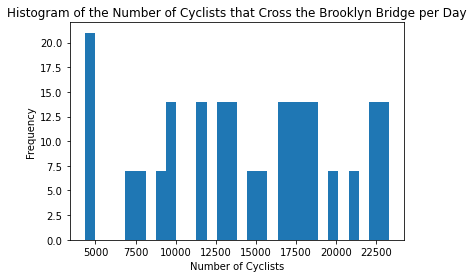

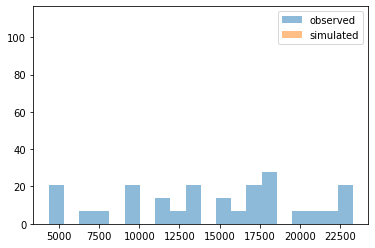

In [34]:
"""
4 Question 4 (20 points)

Go through the provided links on Poisson and exponential distributions
1.	Using the Kaggle API download this dataset and plot the histogram of
the number of cyclists that cross the Brooklyn bridge per day.
2.	Simulate the number of cyclists that cross the Brooklyn bridge per day
using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.

"""

import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download the dataset from Kaggle
kaggle.api.dataset_download_files("new-york-city/nyc-east-river-bicycle-crossings", path="./", unzip=True)


# Load the dataset into a Pandas DataFrame
df = pd.read_csv("C:/Users/Hrithikka/OneDrive/Desktop/njit/nyc-east-river-bicycle-counts.csv")



# Plot the histogram of the number of cyclists that cross the Brooklyn bridge per day
plt.hist(df["Total"], bins=30)
plt.xlabel("Number of Cyclists")
plt.ylabel("Frequency")
plt.title("Histogram of the Number of Cyclists that Cross the Brooklyn Bridge per Day")
plt.show()



# observed count data
observed_counts = df["Total"]

# estimate lambda using MLE
lambda_hat = np.mean(observed_counts)

# number of simulations
n_simulations = 1000

# simulate the count data using Poisson distribution
simulated_counts = np.random.poisson(lambda_hat, size=(n_simulations, len(observed_counts)))

# compare the observed and simulated count data using a histogram


plt.hist(observed_counts, bins=20, alpha=0.5, label='observed')
plt.hist(simulated_counts.mean(axis=1), bins=20, alpha=0.5, label='simulated')
plt.legend()
plt.show()





In [30]:
df.columns

Index(['Unnamed: 0', 'Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)',
       'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge', 'Total'],
      dtype='object')

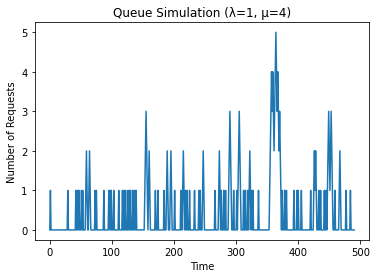

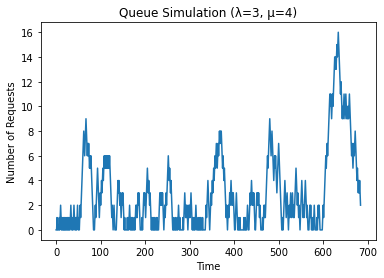

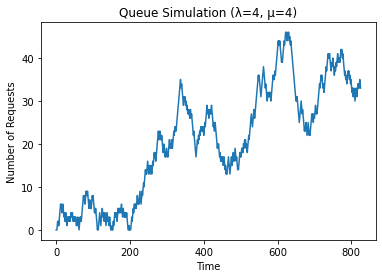

In [50]:
"""
5 Question 5 (20 points)
You are asked to stress test an cloud API endpoint and are told that the API exposes a database server
that can be abstracted as an M/M/1 queue. Go through this introductory page to just understand the queuing
domain and the notation M/M/1. Go also through the elements of the MM1 queue here. Make sure you click on the links
and learn about the random process called Poisson process.
Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a
function of time. You are given three arrival rates of the API requests  λ=[1,3,4] and the service time of the requests 
as an exponential random variable with rate  µ=4.
Here's an example of how you can simulate the behavior of the queue and plot the number of requests that are waiting in 
the queue as a function of time using Python:

"""

import random
import matplotlib.pyplot as plt

def simulate_q(lambda_, mu, time):
    """
    Simulate the behavior of the queue and return the number of requests waiting in the queue at each time step.

    - lambda_: arrival rate of the API requests
    - mu: service rate of the API requests
    - time: total simulation time
    
    Returns requests: list of number of requests waiting in the queue at each time step
    """
    requests = [0]
    t = 0
    while t < time:
        if random.random() < lambdaa / (lambdaa + mu):
            # arrival
            requests.append(requests[-1] + 1)
        elif requests[-1] > 0:
            # departure 
            requests.append(requests[-1] - 1)
        else:
            # idle 
            requests.append(0)
        t += random.expovariate(lambdaa + mu)
    return requests

def plot_q(lambdaa, mu, time):
    """
    Plot the no.of requests that are waiting in the queue 
    where
    - lambda_: arrival rate of the API requests
    - mu: service rate of the API requests
    - time: total simulation time
    """
    requests = simulate_q(lambdaa, mu, time)
    times = [t for t in range(len(requests))]
    plt.plot(times, requests)
    plt.xlabel('Time')
    plt.ylabel('Number of Requests')
    plt.title(f'Queue Simulation (λ={lambdaa}, μ={mu})')
    plt.show()

for lambdaa in [1, 3, 4]:
    plot_q(lambdaa, 4, 100)
